In [1]:
# Загрузка библиотек

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Загрузка набора данных в pandas DataFrame

df = pd.read_csv('freMPL-R.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343080 entries, 0 to 343079
Data columns (total 31 columns):
Exposure             343080 non-null float64
LicAge               343080 non-null int64
RecordBeg            343080 non-null object
RecordEnd            181115 non-null object
VehAge               177880 non-null object
Gender               343080 non-null object
MariStat             343080 non-null object
SocioCateg           343080 non-null object
VehUsage             343080 non-null object
DrivAge              343080 non-null int64
HasKmLimit           343080 non-null int64
BonusMalus           343080 non-null int64
VehBody              145780 non-null object
VehPrice             145780 non-null object
VehEngine            145780 non-null object
VehEnergy            145780 non-null object
VehMaxSpeed          145780 non-null object
VehClass             145780 non-null object
ClaimAmount          343080 non-null float64
RiskVar              145780 non-null float64
Garage    

In [4]:
df.head()

,Exposure,LicAge,RecordBeg,RecordEnd,VehAge,Gender,MariStat,SocioCateg,VehUsage,DrivAge,...,ClaimInd,Dataset,DeducType,ClaimNbResp,ClaimNbNonResp,ClaimNbParking,ClaimNbFireTheft,ClaimNbWindscreen,OutUseNb,RiskArea
0,0.583,366,2004-06-01,NaN,2,Female,Other,CSP1,Professional,55,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.200,187,2004-10-19,NaN,0,Male,Alone,CSP55,Private+trip to office,34,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.083,169,2004-07-16,2004-08-16,1,Female,Other,CSP1,Professional,33,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.375,170,2004-08-16,NaN,1,Female,Other,CSP1,Professional,34,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.500,224,2004-01-01,2004-07-01,3,Male,Other,CSP47,Professional,53,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dct = {}
for i in range(1,11):
    _x = df.loc[df.Dataset == i].notnull().sum()
    dct[i] = list(_x[_x == 0].index)

print('Dataset  Missing Variables')
for x in range(1,11):
    print(x,'\t',dct[x])

Dataset  Missing Variables
1 	 ['DeducType', 'ClaimNbResp', 'ClaimNbNonResp', 'ClaimNbParking', 'ClaimNbFireTheft', 'ClaimNbWindscreen', 'OutUseNb', 'RiskArea']
2 	 ['DeducType', 'ClaimNbResp', 'ClaimNbNonResp', 'ClaimNbParking', 'ClaimNbFireTheft', 'ClaimNbWindscreen', 'OutUseNb', 'RiskArea']
3 	 ['ClaimNbResp', 'ClaimNbNonResp', 'ClaimNbParking', 'ClaimNbFireTheft', 'ClaimNbWindscreen', 'OutUseNb', 'RiskArea']
4 	 ['ClaimNbResp', 'ClaimNbNonResp', 'ClaimNbParking', 'ClaimNbFireTheft', 'ClaimNbWindscreen', 'OutUseNb', 'RiskArea']
5 	 ['VehAge', 'VehBody', 'VehPrice', 'VehEngine', 'VehEnergy', 'VehMaxSpeed', 'VehClass', 'RiskVar', 'Garage', 'DeducType']
6 	 ['VehAge', 'VehBody', 'VehPrice', 'VehEngine', 'VehEnergy', 'VehMaxSpeed', 'VehClass', 'RiskVar', 'Garage', 'DeducType']
7 	 ['VehAge', 'VehBody', 'VehPrice', 'VehEngine', 'VehEnergy', 'VehMaxSpeed', 'VehClass', 'RiskVar', 'Garage', 'DeducType']
8 	 ['VehAge', 'VehBody', 'VehPrice', 'VehEngine', 'VehEnergy', 'VehMaxSpeed', 'VehClass

In [6]:
# Объединяем наборы данных 5-9, удаляем пустые столбцы, удаляем дубликаты

df59 = df.loc[df.Dataset.isin([5, 6, 7, 8, 9])]
df59 = df59.drop(['Dataset'], axis=1)
df59 = df59.dropna(axis=1, how='all')
print('With duplicates\t\t', len(df59))
df59 = df59.drop_duplicates()
print('Without duplicates\t', len(df59))

With duplicates		 165200
Without duplicates	 115155


In [7]:
df59.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115155 entries, 145780 to 310979
Data columns (total 20 columns):
Exposure             115155 non-null float64
LicAge               115155 non-null int64
RecordBeg            115155 non-null object
RecordEnd            59455 non-null object
Gender               115155 non-null object
MariStat             115155 non-null object
SocioCateg           115155 non-null object
VehUsage             115155 non-null object
DrivAge              115155 non-null int64
HasKmLimit           115155 non-null int64
BonusMalus           115155 non-null int64
ClaimAmount          115155 non-null float64
ClaimInd             115155 non-null int64
ClaimNbResp          115155 non-null float64
ClaimNbNonResp       115155 non-null float64
ClaimNbParking       115155 non-null float64
ClaimNbFireTheft     115155 non-null float64
ClaimNbWindscreen    115155 non-null float64
OutUseNb             115155 non-null float64
RiskArea             115155 non-null float64
d

In [8]:
df = df59

In [9]:
# Вспомогательный столбец для суммирования числа полисов

df['PolicyCount'] = 1

In [10]:
# Вспомогательный столбец для суммирования числа полисов с убытками

df['ClaimCount'] = df['ClaimAmount'] > 0

In [11]:
# Вспомогательный столбец для суммирования числа полисов без убытков

df['NoClaimCount'] = df.PolicyCount - df.ClaimCount

In [12]:
df[['PolicyCount','ClaimAmount', 'ClaimCount', 'NoClaimCount']].head()

,PolicyCount,ClaimAmount,ClaimCount,NoClaimCount
145780,1,0.0,False,1
145781,1,0.0,False,1
145782,1,0.0,False,1
145783,1,0.0,False,1
145784,1,0.0,False,1


In [13]:
df_male = df[df['Gender'] == 'Male']
df_male


,Exposure,LicAge,RecordBeg,RecordEnd,Gender,MariStat,SocioCateg,VehUsage,DrivAge,HasKmLimit,...,ClaimNbResp,ClaimNbNonResp,ClaimNbParking,ClaimNbFireTheft,ClaimNbWindscreen,OutUseNb,RiskArea,PolicyCount,ClaimCount,NoClaimCount
145780,0.083,332,2004-01-01,2004-02-01,Male,Other,CSP50,Professional,46,0,...,0.0,1.0,0.0,0.0,0.0,0.0,9.0,1,False,1
145781,0.916,333,2004-02-01,NaN,Male,Other,CSP50,Professional,46,0,...,0.0,1.0,0.0,0.0,0.0,0.0,9.0,1,False,1
145782,0.550,173,2004-05-15,2004-12-03,Male,Other,CSP50,Private+trip to office,32,0,...,0.0,2.0,0.0,0.0,0.0,0.0,7.0,1,False,1
145784,0.233,426,2004-02-07,2004-05-01,Male,Other,CSP60,Private,57,0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1,False,1
145785,0.666,429,2004-05-01,NaN,Male,Other,CSP60,Private,57,0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310974,0.420,358,2004-07-30,NaN,Male,Other,CSP55,Private+trip to office,53,0,...,0.0,1.0,0.0,0.0,0.0,0.0,7.0,1,False,1
310975,0.423,238,2004-07-29,NaN,Male,Other,CSP50,Private+trip to office,39,0,...,0.0,0.0,0.0,0.0,0.0,4.0,8.0,1,False,1
310977,0.805,211,2004-03-11,NaN,Male,Other,CSP55,Private+trip to office,35,0,...,0.0,0.0,1.0,0.0,0.0,0.0,7.0,1,False,1
310978,0.538,356,2004-01-01,2004-07-15,Male,Other,CSP50,Private,52,0,...,0.0,0.0,0.0,0.0,2.0,0.0,7.0,1,False,1


In [14]:
df_female = df[df['Gender'] == 'Female']
df_female

,Exposure,LicAge,RecordBeg,RecordEnd,Gender,MariStat,SocioCateg,VehUsage,DrivAge,HasKmLimit,...,ClaimNbResp,ClaimNbNonResp,ClaimNbParking,ClaimNbFireTheft,ClaimNbWindscreen,OutUseNb,RiskArea,PolicyCount,ClaimCount,NoClaimCount
145783,0.089,364,2004-11-29,NaN,Female,Other,CSP55,Private+trip to office,52,0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1,False,1
145788,0.173,405,2004-10-29,NaN,Female,Other,CSP50,Private+trip to office,53,0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1,False,1
145797,0.106,357,2004-11-23,NaN,Female,Other,CSP50,Private+trip to office,48,0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1,False,1
145798,0.500,328,2004-01-01,2004-07-01,Female,Other,CSP6,Professional run,53,0,...,2.0,0.0,0.0,0.0,0.0,0.0,7.0,1,False,1
145799,0.499,334,2004-07-01,NaN,Female,Other,CSP6,Professional run,53,0,...,2.0,0.0,0.0,0.0,0.0,0.0,7.0,1,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310965,0.575,303,2004-05-30,2004-12-27,Female,Other,CSP55,Private+trip to office,49,0,...,0.0,1.0,0.0,0.0,0.0,0.0,5.0,1,False,1
310969,0.186,221,2004-10-24,NaN,Female,Other,CSP50,Private+trip to office,39,0,...,0.0,0.0,0.0,1.0,3.0,0.0,7.0,1,False,1
310970,0.500,130,2004-05-28,2004-11-28,Female,Other,CSP55,Private+trip to office,34,0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1,False,1
310971,0.092,136,2004-11-28,NaN,Female,Other,CSP55,Private+trip to office,35,0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1,False,1


In [15]:
df_group_SocioCateg_male = df_male[['Exposure', 'PolicyCount','ClaimAmount', 'ClaimCount', 'NoClaimCount']].groupby(df_male['SocioCateg']).sum()
df_group_SocioCateg_male = df_group_SocioCateg_male.reset_index()
df_group_SocioCateg_male['Freq'] = df_group_SocioCateg_male.ClaimCount / df_group_SocioCateg_male.Exposure
df_group_SocioCateg_male['AvgClaim'] = df_group_SocioCateg_male.ClaimAmount / df_group_SocioCateg_male.ClaimCount

In [16]:
df_group_SocioCateg_male = df_group_SocioCateg_male.sort_values('Freq', ascending=False).reset_index()
df_group_SocioCateg_male['Gender'] = 'Male'
df_group_SocioCateg_male

,index,SocioCateg,Exposure,PolicyCount,ClaimAmount,ClaimCount,NoClaimCount,Freq,AvgClaim,Gender
0,36,CSP62,0.334,3,8.448837e+03,1.0,2,2.994012,8448.837462,Male
1,10,CSP3,19.241,42,1.104365e+04,7.0,35,0.363806,1577.663617,Male
2,24,CSP49,80.441,179,5.383448e+04,25.0,154,0.310787,2153.379227,Male
3,33,CSP6,154.350,335,1.006130e+05,45.0,290,0.291545,2235.844471,Male
4,16,CSP40,38.023,81,7.698270e+03,10.0,71,0.262999,769.827009,Male
5,18,CSP42,676.889,1525,3.025970e+05,176.0,1349,0.260013,1719.300968,Male
6,22,CSP47,96.877,201,6.874793e+04,25.0,176,0.258059,2749.917100,Male
7,9,CSP26,201.991,496,8.443734e+04,52.0,444,0.257437,1623.795091,Male
8,39,CSP66,670.753,1433,3.108033e+05,172.0,1261,0.256428,1806.995661,Male
9,21,CSP46,1088.808,2307,4.763022e+05,279.0,2028,0.256244,1707.176234,Male


In [17]:
df_group_SocioCateg_female = df_female[['Exposure', 'PolicyCount','ClaimAmount', 'ClaimCount', 'NoClaimCount']].groupby(df_female['SocioCateg']).sum()
df_group_SocioCateg_female = df_group_SocioCateg_female.reset_index()
df_group_SocioCateg_female['Freq'] = df_group_SocioCateg_female.ClaimCount / df_group_SocioCateg_female.Exposure
df_group_SocioCateg_female['AvgClaim'] = df_group_SocioCateg_female.ClaimAmount / df_group_SocioCateg_female.ClaimCount

In [18]:
df_group_SocioCateg_female = df_group_SocioCateg_female.sort_values('Freq', ascending=False).reset_index()
df_group_SocioCateg_female['Gender'] = 'Female'
df_group_SocioCateg_female

,index,SocioCateg,Exposure,PolicyCount,ClaimAmount,ClaimCount,NoClaimCount,Freq,AvgClaim,Gender
0,16,CSP47,4.496,10,7.411850e+03,3.0,7,0.667260,2470.616616,Female
1,18,CSP49,17.502,36,3.932534e+04,11.0,25,0.628500,3575.030706,Female
2,7,CSP3,10.497,25,1.391763e+04,6.0,19,0.571592,2319.604532,Female
3,22,CSP56,3.767,22,4.504335e+03,2.0,20,0.530926,2252.167523,Female
4,25,CSP6,23.888,50,1.450924e+04,7.0,43,0.293034,2072.748166,Female
5,27,CSP65,3.748,10,5.447746e+02,1.0,9,0.266809,544.774622,Female
6,5,CSP26,388.200,880,1.619346e+05,95.0,785,0.244719,1704.574470,Female
7,11,CSP40,177.488,416,7.865643e+04,42.0,374,0.236636,1872.772033,Female
8,15,CSP46,127.438,275,5.355240e+04,30.0,245,0.235409,1785.079879,Female
9,17,CSP48,280.336,613,2.773849e+05,65.0,548,0.231865,4267.459940,Female


In [19]:
df_all = df_group_SocioCateg_male.append(df_group_SocioCateg_female, sort=False)

In [20]:
df_all

,index,SocioCateg,Exposure,PolicyCount,ClaimAmount,ClaimCount,NoClaimCount,Freq,AvgClaim,Gender
0,36,CSP62,0.334,3,8448.837462,1.0,2,2.994012,8448.837462,Male
1,10,CSP3,19.241,42,11043.645317,7.0,35,0.363806,1577.663617,Male
2,24,CSP49,80.441,179,53834.480665,25.0,154,0.310787,2153.379227,Male
3,33,CSP6,154.350,335,100613.001208,45.0,290,0.291545,2235.844471,Male
4,16,CSP40,38.023,81,7698.270091,10.0,71,0.262999,769.827009,Male
...,...,...,...,...,...,...,...,...,...,...
26,20,CSP51,0.304,3,0.000000,0.0,3,0.000000,NaN,Female
27,8,CSP30,0.050,1,0.000000,0.0,1,0.000000,NaN,Female
28,10,CSP38,0.176,1,0.000000,0.0,1,0.000000,NaN,Female
29,12,CSP41,0.141,2,0.000000,0.0,2,0.000000,NaN,Female


In [21]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

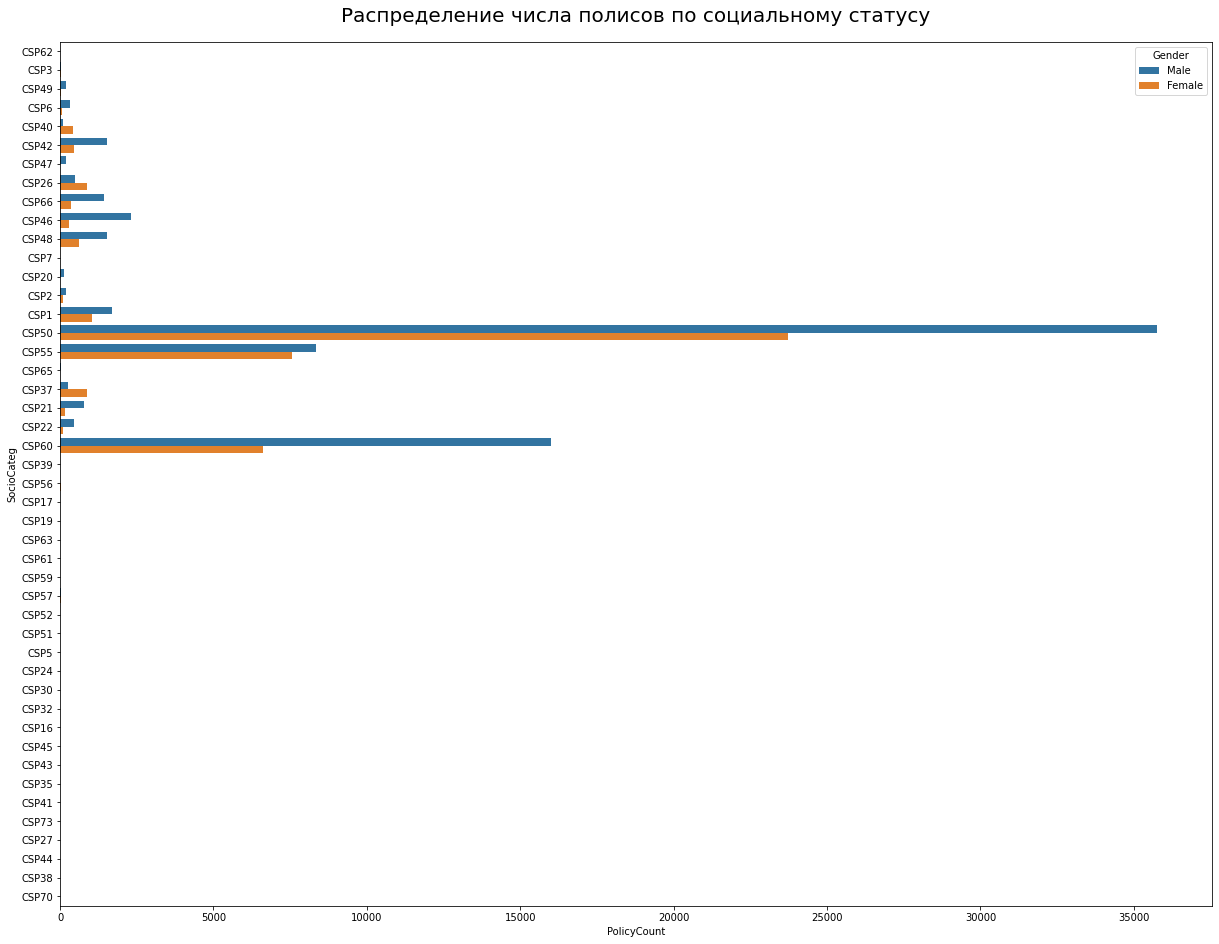

In [22]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Распределение числа полисов по социальному статусу', fontsize = 20, pad=20)

sns.barplot(y='SocioCateg', x='PolicyCount', hue='Gender', data=df_all);

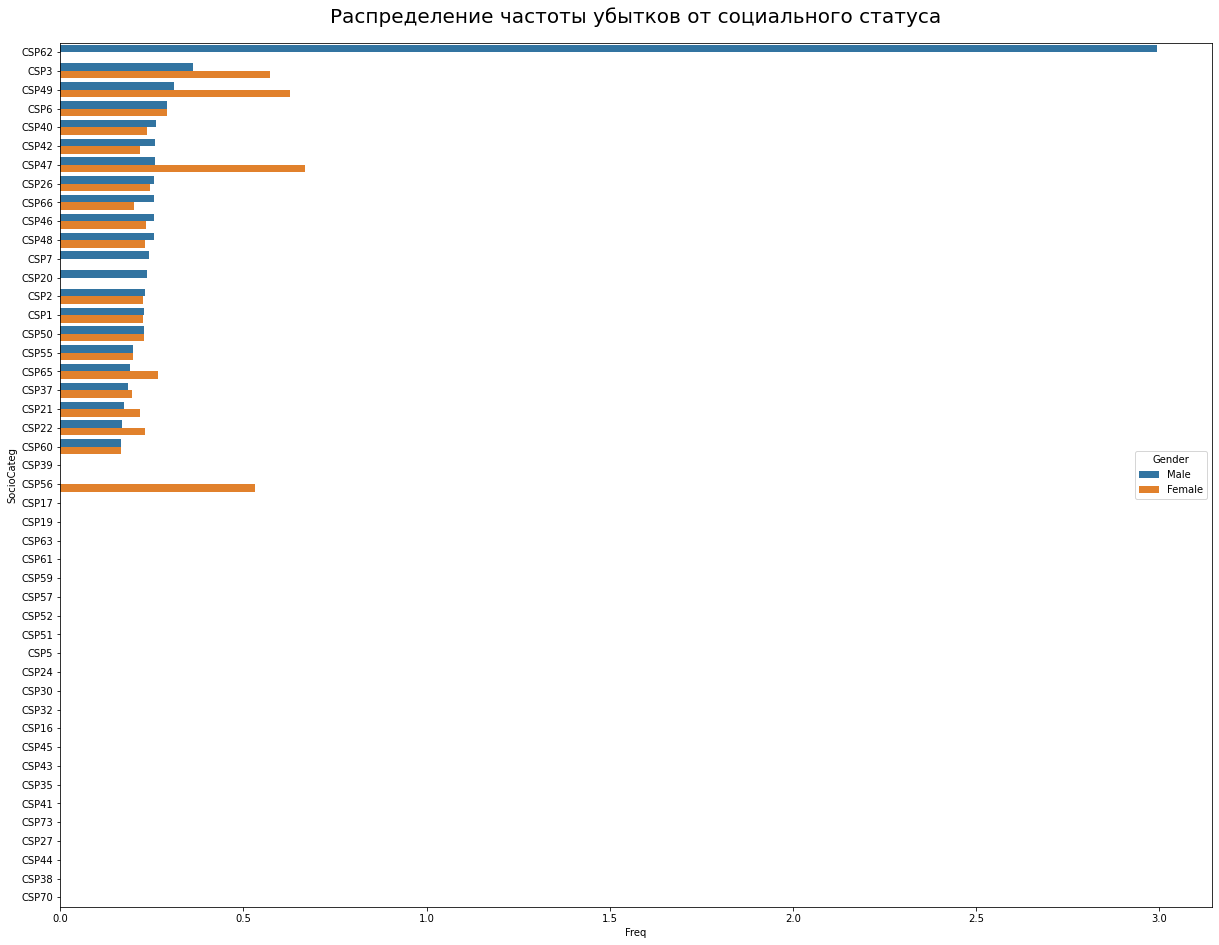

In [23]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Распределение частоты убытков от социального статуса', fontsize = 20, pad=20)

sns.barplot(y='SocioCateg', x='Freq', hue='Gender', data=df_all);

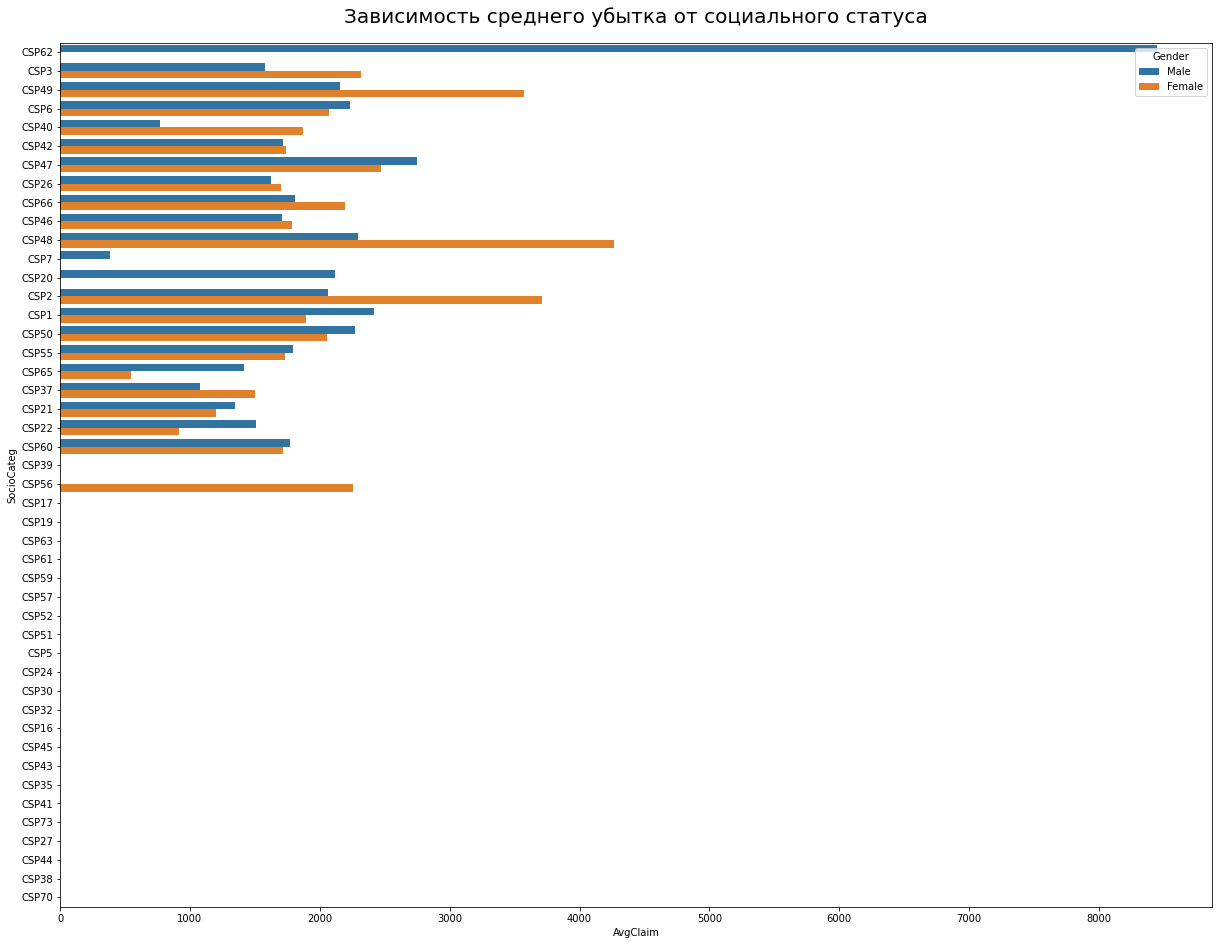

In [24]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Зависимость среднего убытка от социального статуса', fontsize = 20, pad=20)

sns.barplot(y='SocioCateg', x='AvgClaim', hue='Gender', data=df_all);